<a href="https://colab.research.google.com/github/marsavil/Telecom_X_Challenge_Part_2/blob/main/TelecomX_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracción

In [2]:
url = 'https://raw.githubusercontent.com/marsavil/telecom_x_challenge/refs/heads/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.head(2)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,NumServiciosAdicionales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1


#🛠️ Preparación de los Datos

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [4]:
datos['account_Charges.Total'] = datos['account_Charges.Total'].fillna(0) # manejo de valores nan para usuarios nuevos, a los cuales no se les ha facturado aún

In [5]:
datos = datos[datos['Churn'].notna()] # Se eliminan los registros donde el churn es nulo

### Eliminación de Columnas Irrelevantes

In [6]:
datos = datos.drop(columns=['customerID', 'NumServiciosAdicionales' ])
datos.head(2)

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


### Encoding

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
columns = datos.columns
columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

In [9]:
one_hot = make_column_transformer(
                                  (OneHotEncoder(drop='if_binary'),
                                  ['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService',  'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',   ]),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False
)

In [10]:
datos_encoded = one_hot.fit_transform(datos)
datos_encoded

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.00000e+00,
        6.56000e+01, 5.93300e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 9.00000e+00,
        5.99000e+01, 5.42400e+02],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 4.00000e+00,
        7.39000e+01, 2.80850e+02],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        5.03000e+01, 9.27500e+01],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 6.70000e+01,
        6.78500e+01, 4.62765e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 6.30000e+01,
        5.90000e+01, 3.70760e+03]])

In [11]:
df_encoded = pd.DataFrame(datos_encoded, columns=one_hot.get_feature_names_out(columns))
df_encoded.head(2)


,onehotencoder__Churn_Yes,onehotencoder__customer_gender_Male,onehotencoder__customer_SeniorCitizen_1,onehotencoder__customer_Partner_Yes,onehotencoder__customer_Dependents_Yes,onehotencoder__phone_PhoneService_Yes,onehotencoder__phone_MultipleLines_No,onehotencoder__phone_MultipleLines_No phone service,onehotencoder__phone_MultipleLines_Yes,onehotencoder__internet_InternetService_DSL,...,onehotencoder__account_Contract_One year,onehotencoder__account_Contract_Two year,onehotencoder__account_PaperlessBilling_Yes,onehotencoder__account_PaymentMethod_Bank transfer (automatic),onehotencoder__account_PaymentMethod_Credit card (automatic),onehotencoder__account_PaymentMethod_Electronic check,onehotencoder__account_PaymentMethod_Mailed check,remainder__customer_tenure,remainder__account_Charges.Monthly,remainder__account_Charges.Total
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.6,593.3
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.9,542.4


### Verificación de la Proporción de Cancelación (Churn)

In [12]:
datos.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


### Balanceo de Clases

#### Creación y evaluación del modelo

In [13]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=[ 'onehotencoder__Churn_Yes'])
y = df_encoded['onehotencoder__Churn_Yes']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

##### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es {modelo_tree.score(X_train, y_train):.2f}')
print(f'La exactitud del modelo con el conjunto de validación es {modelo_tree.score(X_val, y_val):.2f}')

La exactitud del modelo con el conjunto de entrenamiento es 1.00
La exactitud del modelo con el conjunto de validación es 0.74


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
y_predict = modelo_tree.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_predict)
matriz_confusion

array([[892, 208],
       [179, 218]])

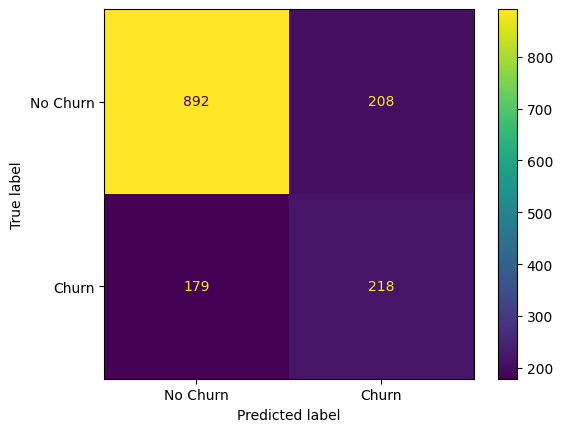

In [17]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=['No Churn', 'Churn'])
visualizacion.plot();

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

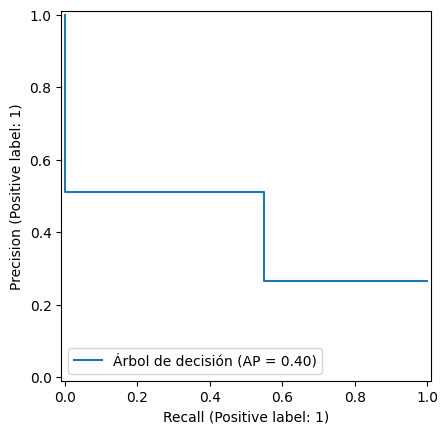

In [19]:
PrecisionRecallDisplay.from_predictions(y_val, y_predict, name ='Árbol de decisión');

In [20]:
print(f' El score promedio de precision vs recall es {average_precision_score(y_val,y_predict):.2f} ')

 El score promedio de precision vs recall es 0.40 


In [21]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1100
         1.0       0.51      0.55      0.53       397

    accuracy                           0.74      1497
   macro avg       0.67      0.68      0.68      1497
weighted avg       0.75      0.74      0.74      1497



###### Prueba de balance

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbPipeline

In [23]:
oversampling = SMOTE()
x_over, y_over = oversampling.fit_resample(X, y)

In [24]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, cross_validate

In [25]:
def intervalo_de_confianza(resultados, nombre_modelo):
    promedio = resultados.mean()
    desvio_std = resultados.std()
    return f'El intervalo de confianza del modelo "{nombre_modelo}" es: [{promedio-2*desvio_std}, {min (promedio+2*desvio_std,1)}]'


###### Oversampling

In [26]:
modelo_tree = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('oversampling', SMOTE()), ('arbol', modelo_tree)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

intervalo_de_confianza(cv['test_score'], "Modelo Balanceado Tree")

'El intervalo de confianza del modelo "Modelo Balanceado Tree" es: [0.4479424442538249, 0.6799150245476353]'

###### Undersampling

In [27]:
modelo_tree = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('undersample', NearMiss(version = 3)), ('arbol', modelo_tree)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

intervalo_de_confianza(cv['test_score'], "Modelo Balanceado")

'El intervalo de confianza del modelo "Modelo Balanceado" es: [0.5290317792633322, 0.7623119899567538]'

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       777
         1.0       0.49      0.66      0.56       280

    accuracy                           0.73      1057
   macro avg       0.68      0.71      0.68      1057
weighted avg       0.76      0.73      0.74      1057



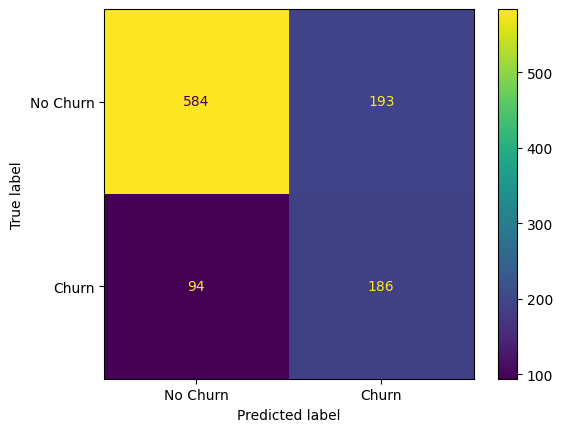

In [28]:
undersample = NearMiss (version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

modelo_tree = DecisionTreeClassifier(max_depth=10)
modelo_tree.fit(x_balanceada, y_balanceada)

y_previsto = modelo_tree.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions (y_test,y_previsto, display_labels=['No Churn', 'Churn']);

##### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
modelo_forest = RandomForestClassifier()
modelo_forest.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es {modelo_forest.score(X_train, y_train):.2f}')
print(f'La exactitud del modelo con el conjunto de validación es {modelo_forest.score(X_val, y_val):.2f}')

La exactitud del modelo con el conjunto de entrenamiento es 1.00
La exactitud del modelo con el conjunto de validación es 0.79


In [31]:
y_predict = modelo_forest.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_predict)
matriz_confusion

array([[995, 105],
       [208, 189]])

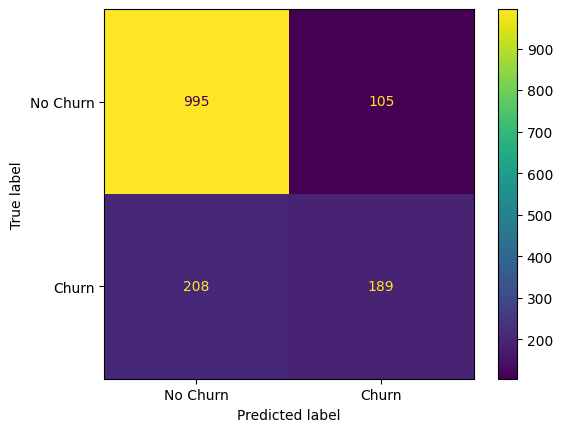

In [32]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=['No Churn', 'Churn'])
visualizacion.plot();

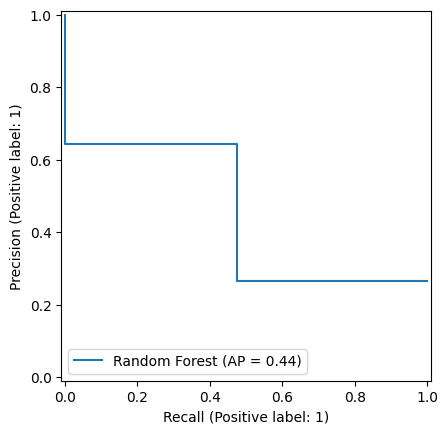

In [33]:
PrecisionRecallDisplay.from_predictions(y_val, y_predict, name ='Random Forest');

In [34]:
print(f' El score promedio de precision vs recall es {average_precision_score(y_val,y_predict):.2f} ')

 El score promedio de precision vs recall es 0.44 


In [35]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1100
         1.0       0.64      0.48      0.55       397

    accuracy                           0.79      1497
   macro avg       0.73      0.69      0.71      1497
weighted avg       0.78      0.79      0.78      1497



###### Prueba de balance

In [36]:
oversampling = SMOTE()
x_over, y_over = oversampling.fit_resample(X, y)

###### Oversampling

In [37]:
modelo_forest = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('oversampling', SMOTE()), ('forest', modelo_forest)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

intervalo_de_confianza(cv['test_score'], "Modelo Balanceado Forest")

'El intervalo de confianza del modelo "Modelo Balanceado Forest" es: [0.499225118060567, 0.6865257301032327]'

###### Undersampling

In [38]:
modelo_forest = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('undersample', NearMiss(version = 3)), ('forest', modelo_forest)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

intervalo_de_confianza(cv['test_score'], "Modelo Balanceado")

'El intervalo de confianza del modelo "Modelo Balanceado" es: [0.5338582872547086, 0.763774790141478]'

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       777
         1.0       0.48      0.65      0.55       280

    accuracy                           0.72      1057
   macro avg       0.67      0.70      0.67      1057
weighted avg       0.76      0.72      0.73      1057



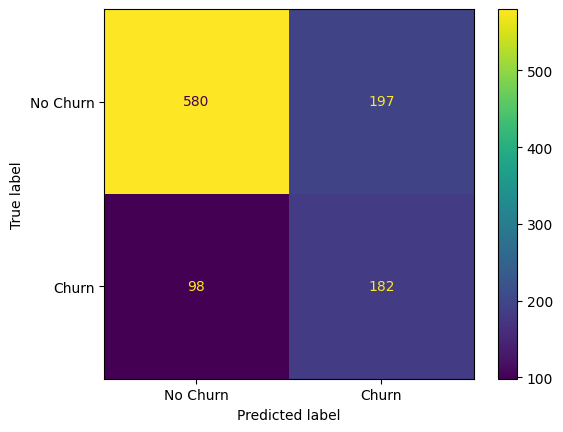

In [39]:
undersample = NearMiss (version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

modelo_forest = DecisionTreeClassifier(max_depth=10)
modelo_forest.fit(x_balanceada, y_balanceada)

y_previsto = modelo_forest.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions (y_test,y_previsto, display_labels=['No Churn', 'Churn']);

#🎯 Correlación y Selección de Variables






In [40]:
# Por ejemplo, si ya tenés df con todas las variables numéricas + 'onehotencoder__Churn_Yes'
corr_matrix = df_encoded.corr(numeric_only=True)
corr_matrix


,onehotencoder__Churn_Yes,onehotencoder__customer_gender_Male,onehotencoder__customer_SeniorCitizen_1,onehotencoder__customer_Partner_Yes,onehotencoder__customer_Dependents_Yes,onehotencoder__phone_PhoneService_Yes,onehotencoder__phone_MultipleLines_No,onehotencoder__phone_MultipleLines_No phone service,onehotencoder__phone_MultipleLines_Yes,onehotencoder__internet_InternetService_DSL,...,onehotencoder__account_Contract_One year,onehotencoder__account_Contract_Two year,onehotencoder__account_PaperlessBilling_Yes,onehotencoder__account_PaymentMethod_Bank transfer (automatic),onehotencoder__account_PaymentMethod_Credit card (automatic),onehotencoder__account_PaymentMethod_Electronic check,onehotencoder__account_PaymentMethod_Mailed check,remainder__customer_tenure,remainder__account_Charges.Monthly,remainder__account_Charges.Total
onehotencoder__Churn_Yes,1.000000,-0.008612,0.150889,-0.150448,-0.164221,0.011942,-0.032569,-0.011942,0.040102,-0.124214,...,-0.177820,-0.302253,0.191825,-0.117937,-0.134302,0.301919,-0.091683,-0.352229,0.193356,-0.198324
onehotencoder__customer_gender_Male,-0.008612,1.000000,-0.001874,-0.001808,0.010517,-0.006488,0.004476,0.006488,-0.008414,0.006568,...,0.008026,-0.003695,-0.011754,-0.016024,0.001215,0.000752,0.013744,0.005106,-0.014569,-0.000080
onehotencoder__customer_SeniorCitizen_1,0.150889,-0.001874,1.000000,0.016479,-0.211185,0.008576,-0.136213,-0.008576,0.142948,-0.108322,...,-0.046262,-0.117000,0.156530,-0.016159,-0.024135,0.171718,-0.153477,0.016567,0.220173,0.103006
onehotencoder__customer_Partner_Yes,-0.150448,-0.001808,0.016479,1.000000,0.452676,0.017706,-0.129929,-0.017706,0.142057,-0.000851,...,0.082783,0.248091,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.379697,0.096848,0.317504
onehotencoder__customer_Dependents_Yes,-0.164221,0.010517,-0.211185,0.452676,1.000000,-0.001762,0.023198,0.001762,-0.024526,0.052010,...,0.068368,0.204613,-0.111377,0.052021,0.060267,-0.150642,0.059071,0.159712,-0.113890,0.062078
onehotencoder__phone_PhoneService_Yes,0.011942,-0.006488,0.008576,0.017706,-0.001762,1.000000,0.315431,-1.000000,0.279690,-0.452425,...,-0.002791,0.003519,0.016505,0.007556,-0.007721,0.003062,-0.003319,0.008448,0.247398,0.113214
onehotencoder__phone_MultipleLines_No,-0.032569,0.004476,-0.136213,-0.129929,0.023198,0.315431,1.000000,-0.315431,-0.822853,-0.070179,...,0.002098,-0.102937,-0.151864,-0.070178,-0.063921,-0.080836,0.222605,-0.323088,-0.338314,-0.396059
onehotencoder__phone_MultipleLines_No phone service,-0.011942,0.006488,-0.008576,-0.017706,0.001762,-1.000000,-0.315431,1.000000,-0.279690,0.452425,...,0.002791,-0.003519,-0.016505,-0.007556,0.007721,-0.003062,0.003319,-0.008448,-0.247398,-0.113214
onehotencoder__phone_MultipleLines_Yes,0.040102,-0.008414,0.142948,0.142057,-0.024526,0.279690,-0.822853,-0.279690,1.000000,-0.199920,...,-0.003794,0.106253,0.163530,0.075527,0.060048,0.083618,-0.227206,0.331941,0.490434,0.468504
onehotencoder__internet_InternetService_DSL,-0.124214,0.006568,-0.108322,-0.000851,0.052010,-0.452425,-0.070179,0.452425,-0.199920,1.000000,...,0.046795,0.031714,-0.063121,0.025476,0.051438,-0.104418,0.041899,0.013274,-0.160189,-0.052469


In [41]:
cor_churn = corr_matrix['onehotencoder__Churn_Yes'].drop('onehotencoder__Churn_Yes').sort_values(key=abs, ascending=False)
print(cor_churn)


onehotencoder__account_Contract_Month-to-month                    0.405103
remainder__customer_tenure                                       -0.352229
onehotencoder__internet_OnlineSecurity_No                         0.342637
onehotencoder__internet_TechSupport_No                            0.337281
onehotencoder__internet_InternetService_Fiber optic               0.308020
onehotencoder__account_Contract_Two year                         -0.302253
onehotencoder__account_PaymentMethod_Electronic check             0.301919
onehotencoder__internet_OnlineBackup_No                           0.268005
onehotencoder__internet_DeviceProtection_No                       0.252481
onehotencoder__internet_DeviceProtection_No internet service     -0.227890
onehotencoder__internet_StreamingMovies_No internet service      -0.227890
onehotencoder__internet_StreamingTV_No internet service          -0.227890
onehotencoder__internet_TechSupport_No internet service          -0.227890
onehotencoder__internet_O

# 🤖 Modelado Predictivo

In [42]:
from sklearn.dummy import DummyClassifier

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [44]:
Baseline = DummyClassifier()
Baseline.fit(X_train, y_train)

DummyClassifier()

In [45]:
y_predict_dummy = Baseline.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Baseline = DummyClassifier(strategy='stratified', random_state=5)
Baseline.fit(X_train, y_train)
y_predict_dummy = Baseline.predict(X_test)
y_prob_dummy = Baseline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_predict_dummy)
precision = precision_score(y_test, y_predict_dummy, zero_division=0)
recall = recall_score(y_test, y_predict_dummy, zero_division=0)
f1 = f1_score(y_test, y_predict_dummy, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob_dummy)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")



Accuracy: 0.598
Precision: 0.251
Recall: 0.267
F1 Score: 0.259
ROC AUC: 0.491


In [ ]:
from sklearn.model_selection import train_test_split

# Creación del grupo de prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenamiento y validación (60% / 20%)
X_train, X_val, y_train, y_val =  train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  HistGradientBoostingClassifier

models = {
    'Dummy': Baseline,
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=5),
    'Gradient Boosting': HistGradientBoostingClassifier(random_state=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"Modelo: {name}")
    print(f" Accuracy: {accuracy:.3f}")
    print(f" Precision: {precision:.3f}")
    print(f" Recall: {recall:.3f}")
    print(f" F1 Score: {f1:.3f}")
    print(f" ROC AUC: {roc_auc:.3f}")
    print("-" * 30)


Modelo: Dummy
 Accuracy: 0.621
 Precision: 0.293
 Recall: 0.302
 F1 Score: 0.297
 ROC AUC: 0.519
------------------------------
Modelo: Logistic Regression
 Accuracy: 0.821
 Precision: 0.713
 Recall: 0.544
 F1 Score: 0.617
 ROC AUC: 0.847
------------------------------
Modelo: Random Forest
 Accuracy: 0.943
 Precision: 0.926
 Recall: 0.854
 F1 Score: 0.889
 ROC AUC: 0.976
------------------------------
Modelo: Gradient Boosting
 Accuracy: 0.878
 Precision: 0.825
 Recall: 0.688
 F1 Score: 0.750
 ROC AUC: 0.934
------------------------------


##🛠️ Seteando Hiperparémetros

In [51]:
len(df_encoded.columns) # Exploramos la cantidad de columnas (Variables) de nuestro data frame

41

In [71]:
def calcular_metricas(y_val, y_predict, y_prob):
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val, y_prob)
    metrics = {
        'Accuracy' : round(accuracy,4),
        'Precision' : round(precision,4),
        'Recall' : round(recall, 4),
        'F1 Score' : round(f1, 4),
        'ROC AUC' : round(roc_auc, 4)
    }
    return metrics

### Random forest

In [62]:
model_forest = RandomForestClassifier(max_depth=5, random_state=5)
model_forest.fit(X_train, y_train)
importances_forest = model_forest.feature_importances_  # Exploramos la importancia de cada variable para nuestro modelo
forest_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': ((importances_forest)*100).round(2)}).sort_values('importance', ascending=False)
forest_feature_importances.head(5)

,feature,importance
29,onehotencoder__account_Contract_Month-to-month,21.35
37,remainder__customer_tenure,13.14
11,onehotencoder__internet_OnlineSecurity_No,8.04
39,remainder__account_Charges.Total,7.42
20,onehotencoder__internet_TechSupport_No,6.59


In [83]:
resultado = pd.DataFrame(index=[ 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

In [65]:
model_features = RandomForestClassifier(max_depth=5, random_state=5)

In [84]:
ct_features = [i if i != 0 else 1 for i in range(10,45,5)] # creamos la lista de iteración con cantidades de 1  a 45 cada 5

ct_features


[10, 15, 20, 25, 30, 35, 40]

In [85]:
for i in ct_features:
  selected_features = forest_feature_importances['feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_val_selected = X_val[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_predict = model_features.predict(X_test_selected)
  y_prob = model_features.predict_proba(X_val_selected)[:, 1]
  y_predict = model_features.predict(X_test_selected)
  metricas = calcular_metricas(y_val, y_predict, y_prob)
  resultado[i] = list(metricas.values())

resultado

,10,15,20,25,30,35,40
Accuracy,0.8784,0.8784,0.8784,0.8784,0.8784,0.8784,0.8784
Precision,0.8248,0.8248,0.8248,0.8248,0.8248,0.8248,0.8248
Recall,0.6877,0.6877,0.6877,0.6877,0.6877,0.6877,0.6877
F1 Score,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500
ROC AUC,0.8601,0.8569,0.8568,0.8599,0.8588,0.8557,0.8574


In [86]:
resultado = pd.DataFrame(index=[ 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
ct_features = [i  for i in range(10,15)]
for i in ct_features:
  selected_features = forest_feature_importances['feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_val_selected = X_val[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_predict = model_features.predict(X_test_selected)
  y_prob = model_features.predict_proba(X_val_selected)[:, 1]
  y_predict = model_features.predict(X_test_selected)
  metricas = calcular_metricas(y_val, y_predict, y_prob)
  resultado[i] = list(metricas.values())

resultado

,10,11,12,13,14
Accuracy,0.8784,0.8784,0.8784,0.8784,0.8784
Precision,0.8248,0.8248,0.8248,0.8248,0.8248
Recall,0.6877,0.6877,0.6877,0.6877,0.6877
F1 Score,0.7500,0.7500,0.7500,0.7500,0.7500
ROC AUC,0.8601,0.8594,0.8588,0.8588,0.8570
